<a href="https://colab.research.google.com/github/fauziahs13/portfolio_Dec2024/blob/main/Google_Trends_Data_Resampling_and_Visualising_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate?

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [ ]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li>
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [ ]:
print(df_tesla.shape)
print(df_tesla.columns)
df_tesla.head()

(124, 3)
Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')


,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [ ]:
tesla_value = df_tesla.sort_values('TSLA_WEB_SEARCH')
index_largest = tesla_value.index[-1]
print(df_tesla.TSLA_WEB_SEARCH[index_largest])
index_smallest = tesla_value.index[0]
print(df_tesla.TSLA_WEB_SEARCH[index_smallest])

print(f'Largest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH[index_largest]}')
print(f'Smallest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH[index_smallest]}')

# easier way
print(f'Largest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.min()}')

31
2
Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2
Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [ ]:
# easiest way
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


In [ ]:
df_tesla.describe()['TSLA_WEB_SEARCH']

,TSLA_WEB_SEARCH
count,124.000000
mean,8.725806
std,5.870332
min,2.000000
25%,3.750000
50%,8.000000
75%,12.000000
max,31.000000


### Unemployment Data

In [ ]:
print(df_unemployment.shape)
df_unemployment.head()

(181, 3)


,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [ ]:
df_unemployment.UNRATE.sort_values()

,UNRATE
178,3.7
176,3.7
172,3.8
174,3.8
175,3.8
...,...
70,9.9
71,9.9
74,9.9
75,9.9


In [ ]:
df_unemployment.describe()

,UE_BENEFITS_WEB_SEARCH,UNRATE
count,181.000000,181.000000
mean,35.110497,6.217680
std,20.484925,1.891859
min,14.000000,3.700000
25%,21.000000,4.700000
50%,26.000000,5.400000
75%,45.000000,7.800000
max,100.000000,10.000000


In [ ]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment.UE_BENEFITS_WEB_SEARCH.max()}')

Largest value for "Unemployemnt Benefits" in Web Search: 100


#### INSIGHT = *The unemployment DataFrame has 181 rows and 3 columns. As with Tesla, we have monthly data from 2004 onwards, organised in rows. Interestingly here, the largest value in the search column is 100.*

Numbers represent search interest relative to the highest point on the chart for the given region and time. **A value of 100 is the peak popularity for the term.** A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.

### Bitcoin

In [ ]:
print(df_btc_price.shape)
df_btc_price[:15]

(2204, 3)


,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0
5,2014-09-22,402.152008,24127600.0
6,2014-09-23,435.790985,45099500.0
7,2014-09-24,423.204987,30627700.0
8,2014-09-25,411.574005,26814400.0
9,2014-09-26,404.424988,21460800.0


In [ ]:
print(df_btc_search.shape)
df_btc_search.head()

(73, 2)


,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [ ]:
df_btc_search.describe()

,BTC_NEWS_SEARCH
count,73.000000
mean,15.013699
std,15.146959
min,3.000000
25%,5.000000
50%,14.000000
75%,18.000000
max,100.000000


In [ ]:
print(f'largest BTC News Search: {df_btc_search.BTC_NEWS_SEARCH.max()}')

largest BTC News Search: 100


**We can see from our DataFrames that Google's search interest ranges between 0 and 100.** For each word in your search, Google finds how much search volume in each region and time period your term had relative to all the searches in that region and time period. It then combines all of these measures into a single measure of popularity, and then it scales the values across your topics, so the largest measure is set to 100. **In short: Google Trends doesn’t exactly tell you how many searches occurred for your topic, but it does give you a nice proxy.**

# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [ ]:
df_tesla.isna().values.any()

False

In [ ]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False


In [ ]:
print(f'Missing values for BTC price?: {df_btc_price.isna().values.any()}')

Missing values for BTC price?: True


In [ ]:
print(f'Number of missing values: {df_btc_price.isna().value_counts().count()}')
print(f'Number of missing values: {df_btc_price.isna().values.sum()}')
df_btc_price[df_btc_price.CLOSE.isna()]
# df_btc_price.isna().value_counts()

Number of missing values: 2
Number of missing values: 2


,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


**Challenge**: Remove any missing values that you found.

In [ ]:
df_btc_price = df_btc_price.dropna()
# df_btc_price.dropna(inplace=True)
df_btc_price.isna().values.any()

False

### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [ ]:
print(type(df_tesla.MONTH[0]))
print(type(df_unemployment.MONTH[0]))
print(type(df_btc_price.DATE[0]))
print(type(df_btc_search.MONTH[0]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [ ]:
df_tesla.MONTH = pd.to_datetime(df_tesla['MONTH'])
df_unemployment.MONTH = pd.to_datetime(df_unemployment['MONTH'])
df_btc_price.DATE = pd.to_datetime(df_btc_price['DATE'])
df_btc_search.MONTH = pd.to_datetime(df_btc_search['MONTH'])

<ipython-input-90-0108128c36a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_btc_price.DATE = pd.to_datetime(df_btc_price['DATE'])


In [ ]:
print(type(df_tesla.MONTH[0]))
print(type(df_unemployment.MONTH[0]))
print(type(df_btc_price.DATE[0]))
print(type(df_btc_search.MONTH[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
df_tesla.MONTH.head()

,MONTH
0,2010-06-01
1,2010-07-01
2,2010-08-01
3,2010-09-01
4,2010-10-01


### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In our case, **we want the last available price of the month aka the price at month-end** which is 386.944000 for September 30th

In [ ]:
df_btc_monthly = df_btc_price.resample('M', on='DATE').last()
print(df_btc_monthly.shape)
df_btc_monthly.head()

(73, 2)


<ipython-input-93-34dece21c30c>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_btc_monthly = df_btc_price.resample('M', on='DATE').last()


,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,34707300.0
2014-10-31,338.321014,12545400.0
2014-11-30,378.046997,9194440.0
2014-12-31,320.192993,13942900.0
2015-01-31,217.464005,23348200.0


In [ ]:
df_btc_monthly.CLOSE.sort_values(ascending=False)

,CLOSE
DATE,
2017-12-31,14156.400391
2020-08-31,11680.820313
2020-07-31,11323.466797
2020-09-30,10912.536133
2019-06-30,10817.155273
...,...
2015-04-30,236.145004
2015-09-30,236.059998
2015-05-31,230.190002


#### We have 73 rows in our price data - the same as our search data. Nice! 😎

In [ ]:
#  If we wanted the average price over the course of the month, it's optional
df_btc_monthly_avg = df_btc_price.resample('ME', on='DATE').mean()
print(df_btc_monthly_avg.shape)
df_btc_monthly_avg.head()

(73, 2)


,CLOSE,VOLUME
DATE,,
2014-09-30,407.182428,2.934864e+07
2014-10-31,364.148873,2.912885e+07
2014-11-30,366.099799,2.199111e+07
2014-12-31,341.267871,1.784201e+07
2015-01-31,248.782547,3.544555e+07


# Data Visualisation

### Notebook Formatting & Style Helpers

In [ ]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_format = mdates.DateFormatter('%Y')

In [ ]:
# Register date converters to avoid warning messages
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
# mau tau aja
print(type(df_tesla.TSLA_USD_CLOSE[0]))
print(type(df_tesla.TSLA_WEB_SEARCH[0]))

<class 'numpy.float64'>
<class 'numpy.int64'>


### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'.

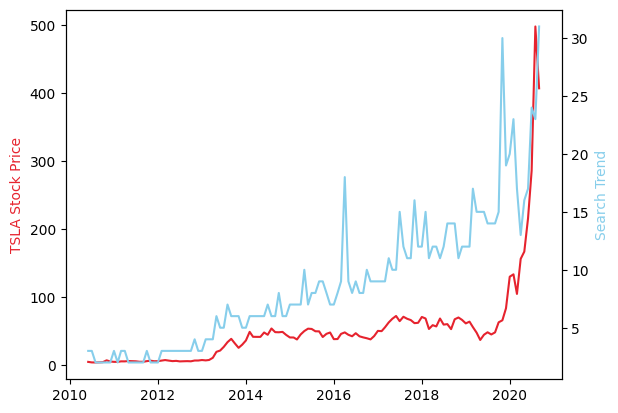

In [ ]:
ax1 = plt.gca() # get current axis
ax2 = ax1.twinx() # create another axis theat shares the same x-axis

ax1.set_ylabel('TSLA Stock Price', color='#E6232E') # can use a HEX code
ax2.set_ylabel('Search Trend', color='skyblue') # or a named colour

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#E6232E')
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='skyblue')

**Challenge**: Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price.
<br>
<br>
Hint: you can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs).  

**Challenge**: Make the chart larger and easier to read.
1. Increase the figure size (e.g., to 14 by 8).
2. Increase the font sizes for the labels and the ticks on the x-axis to 14.
3. Rotate the text on the x-axis by 45 degrees.
4. Make the lines on the chart thicker.
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html).
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html).
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

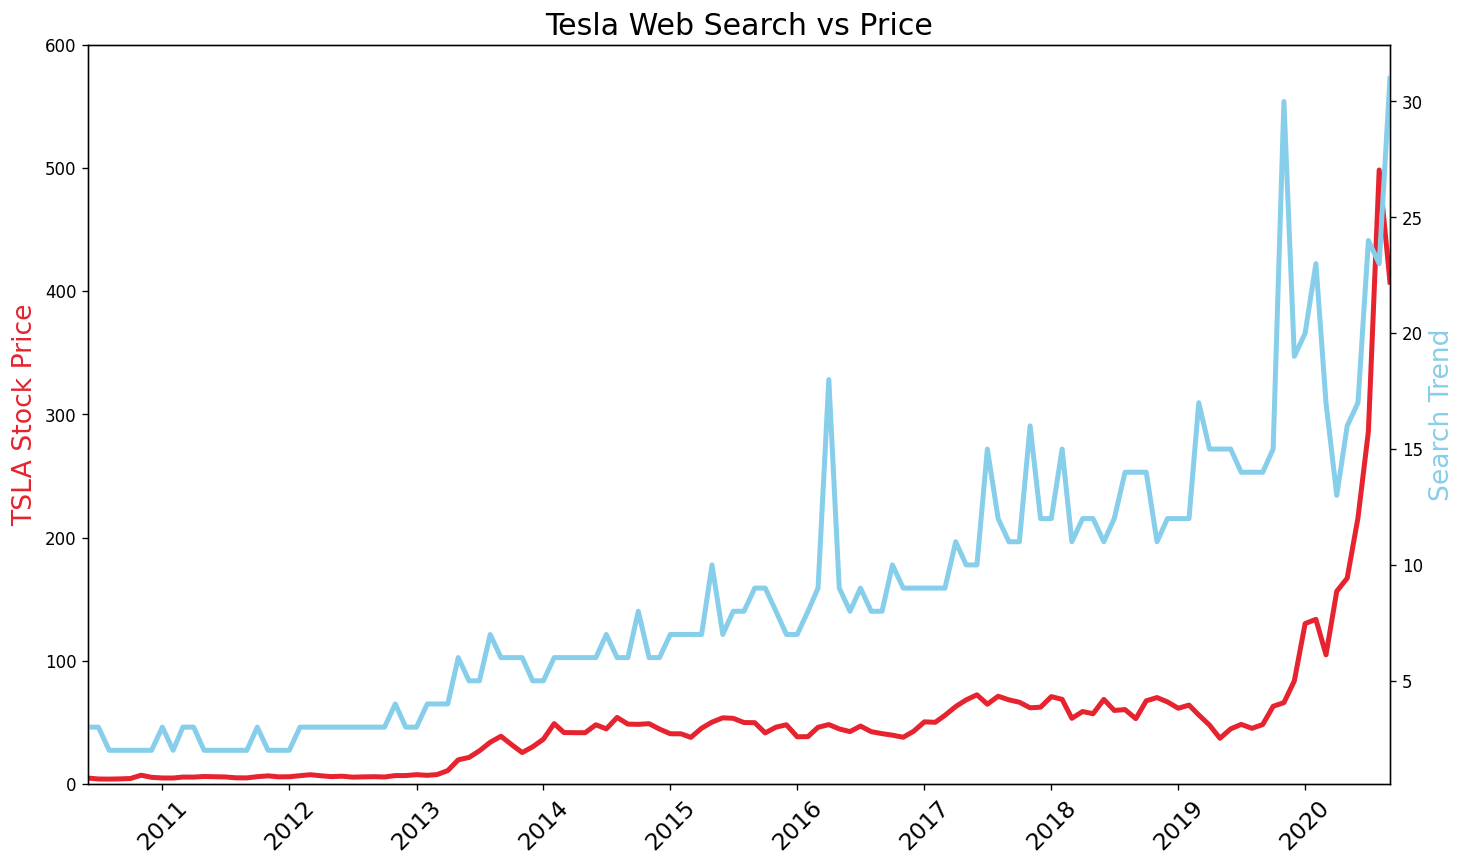

In [ ]:
# increases size and resolution
plt.figure(figsize=(14,8), dpi=120)
plt.title('Tesla Web Search vs Price', fontsize=18)

# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca() # get current axis
ax2 = ax1.twinx() # create another axis that shares the same x-axis
# Also, increase fontsize and linewidth for larger charts
ax1.set_ylabel('TSLA Stock Price', color='#E6232E', fontsize=16) # can use a HEX code
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=16) # or a named colour


# Set the minimum and maximum values on the axes
ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#E6232E', linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='skyblue', linewidth=3)

# Displays chart explicitly
plt.show()

How to add tick formatting for dates on the x-axis.

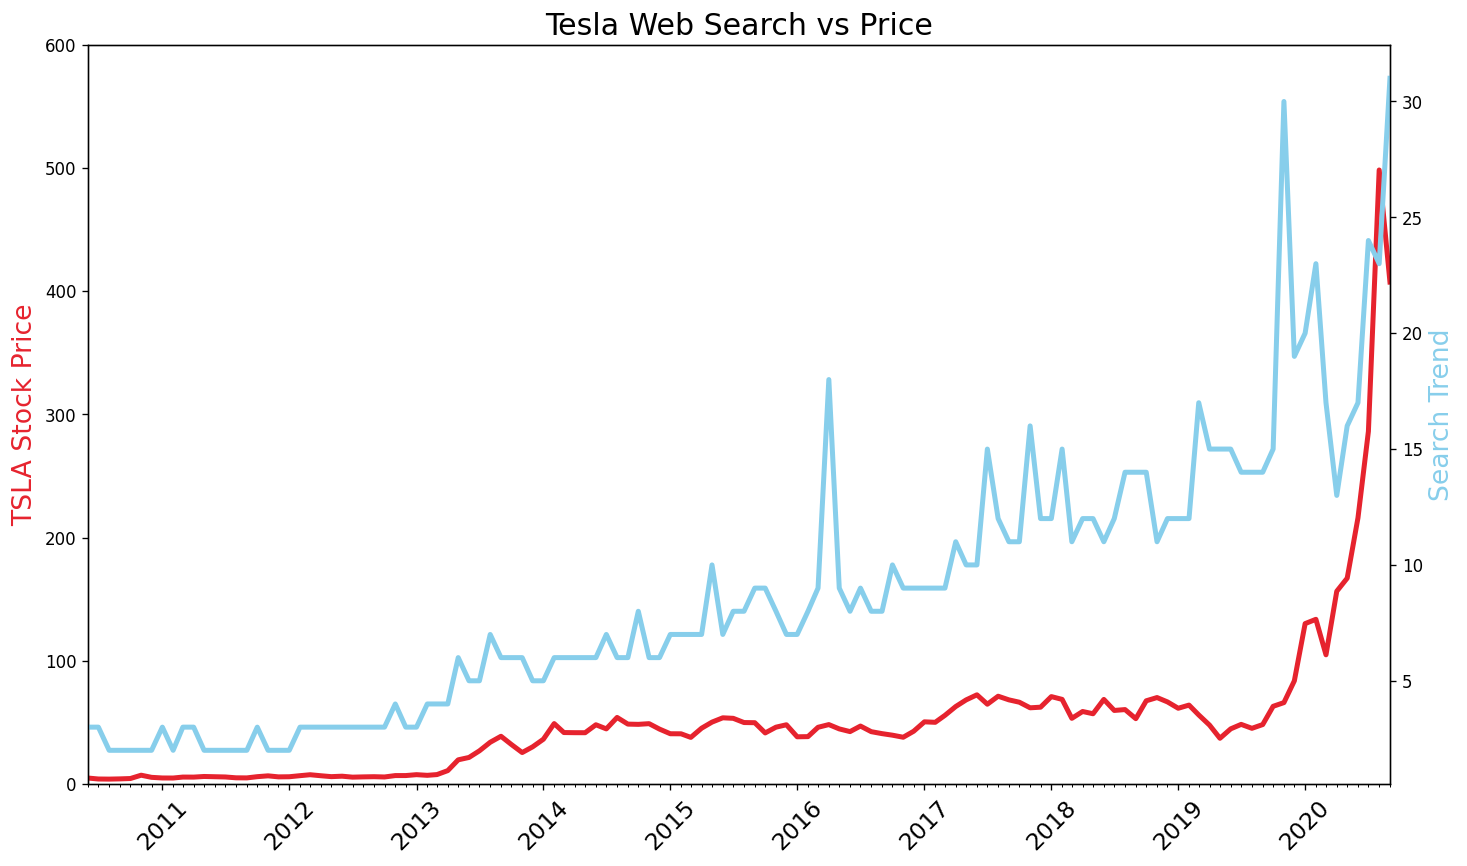

In [ ]:
# increases size and resolution
plt.figure(figsize=(14,8), dpi=120)
plt.title('Tesla Web Search vs Price', fontsize=18)

# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca() # get current axis
ax2 = ax1.twinx() # create another axis that shares the same x-axis
# Also, increase fontsize and linewidth for larger charts
ax1.set_ylabel('TSLA Stock Price', color='#E6232E', fontsize=16) # can use a HEX code
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=16) # or a named colour

# Set the minimum and maximum values on the axes
ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#E6232E', linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='skyblue', linewidth=3)

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_format)
ax1.xaxis.set_minor_locator(months)

# Displays chart explicitly
plt.show()

#### INSIGHT = *When we take a look at our chart, we can see the tick marks nicely. The tick marks also allow us to visually date that spike of interest in the middle of the chart - **March 2016**. This was when the Tesla Model 3 was unveiled. Also, we can clearly see that **the most recent spikes in search** coincide, not with the release of a new car, but the roaring stock price for the company!*

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

In [ ]:
# df_btc_monthly = df_btc_price.resample('M', on='DATE').last()

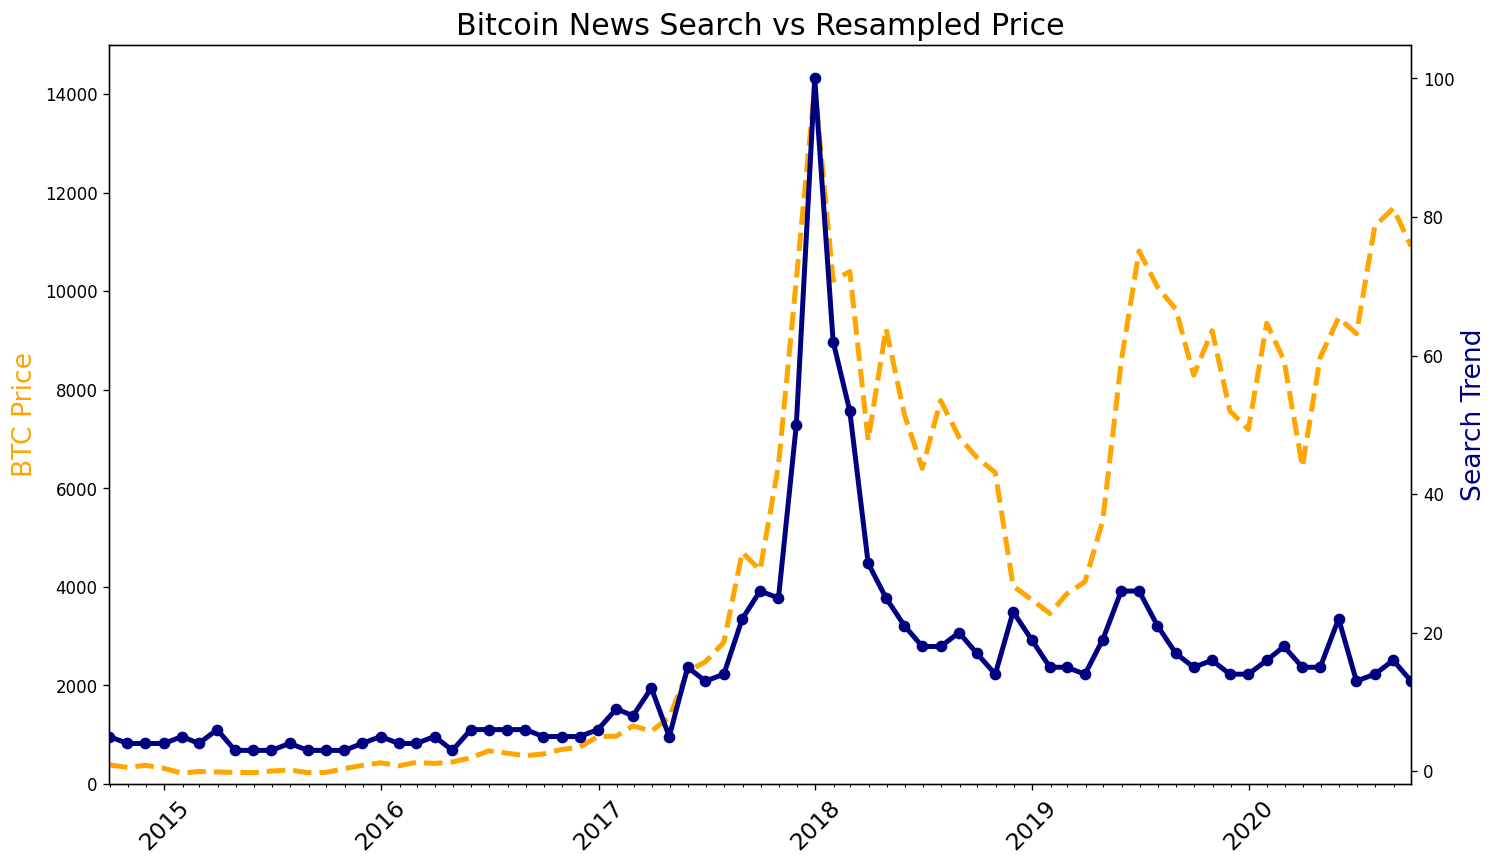

In [ ]:
# increases size and resolution
plt.figure(figsize=(14,8), dpi=120)
plt.title('Bitcoin News Search vs Resampled Price', fontsize=18)

# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca() # get current axis
ax2 = ax1.twinx() # create another axis that shares the same x-axis
# Also, increase fontsize and linewidth for larger charts
ax1.set_ylabel('BTC Price', color='orange', fontsize=16)
ax2.set_ylabel('Search Trend', color='navy', fontsize=16)

# Set the minimum and maximum values on the axes
ax1.set_ylim([0, 15000])
# 217.4, 14156.4
ax1.set_xlim([df_btc_monthly.index.min(),df_btc_monthly.index.max()])

ax1.plot(df_btc_monthly.index, df_btc_monthly.CLOSE,
         color='orange', linewidth=3, linestyle='--')
ax2.plot(df_btc_monthly.index, df_btc_search.BTC_NEWS_SEARCH,
         color='navy', linewidth=3, marker='o')

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_format)
ax1.xaxis.set_minor_locator(months)

# Displays chart explicitly
plt.show()

#### INSIGHT = *What we see in the chart is that similar to Tesla, the crazy price movements **in the beginning of 2018 are associated with very high search volumes**. Everyone was talking about (and buying) Bitcoin in late 2017/early 2018 so search volumes were at a record high!  Interestingly, there was quite a huge spike in bitcoin prices in Q1 of 2019, but this time the increase in search volume was much less pronounced (perhaps because at this point everyone knew what Bitcoin was).*

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate.
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br>
5. Can you discern any seasonality in the searches? Is there a pattern?

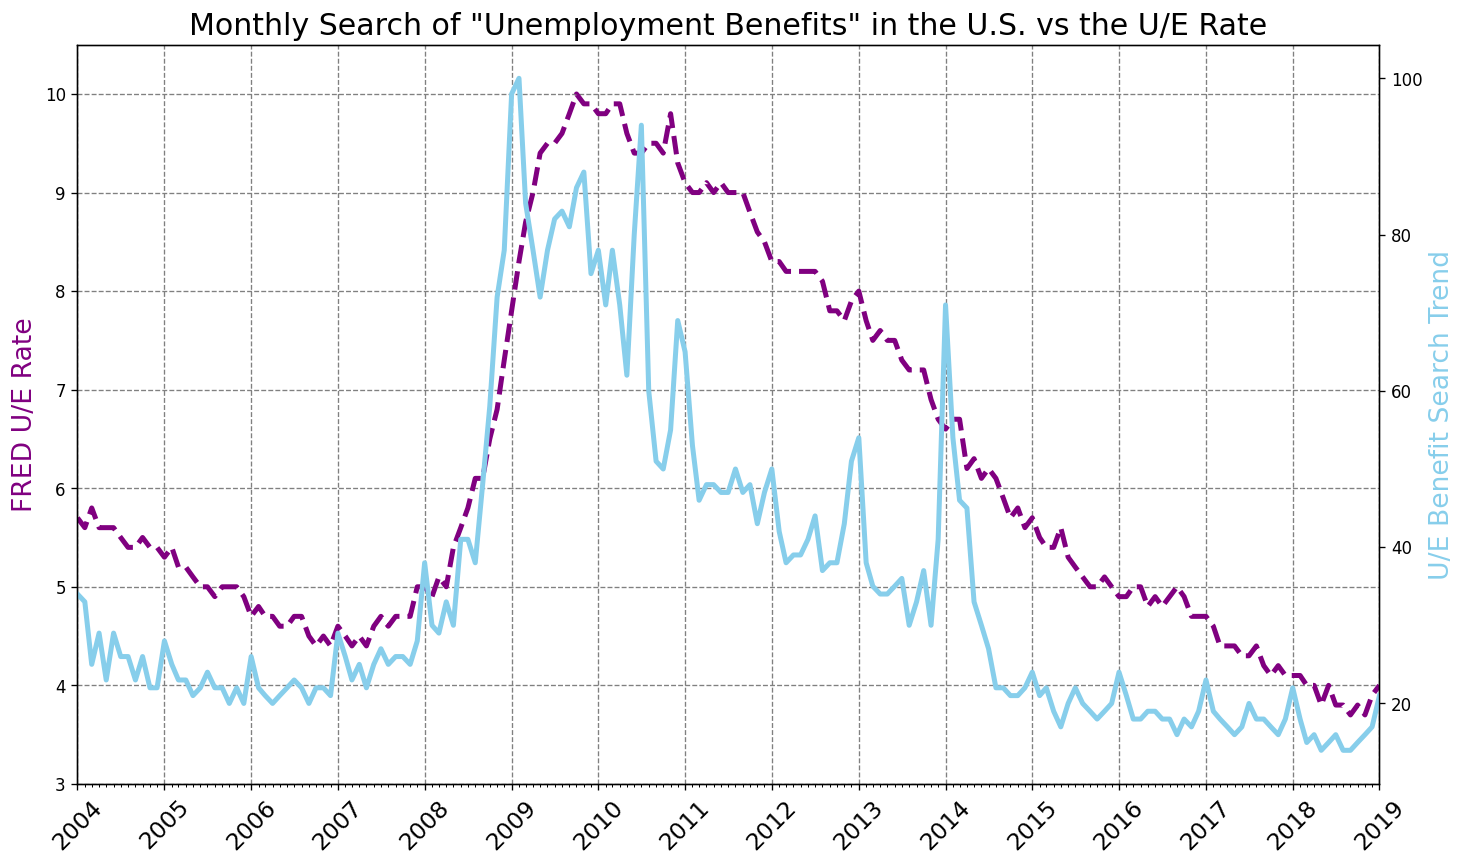

In [ ]:
# increases size and resolution
plt.figure(figsize=(14,8), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)

# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca() # get current axis
ax2 = ax1.twinx() # create another axis that shares the same x-axis
# Also, increase fontsize and linewidth for larger charts
ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('U/E Benefit Search Trend', color='skyblue', fontsize=16)


# Set the minimum and maximum values on the axes
ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])

ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE,
         color='purple', linewidth=3, linestyle='--')
ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH,
         color='skyblue', linewidth=3)

# Show the grid lines as dark grey lines
ax1.grid(color='grey', linestyle='--')

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_format)
ax1.xaxis.set_minor_locator(months)

# Displays chart explicitly
plt.show()

#### INSIGHT = *1) Notice how we can now clearly see the vertical dashed lines line up with spikes in searches for "Unemployment benefits". **Many of the spikes are at year-end - in December**. This clearly shows that there is seasonality in the job market. What else do we see?* 2) We see that the financial crisis in 2007/2008 caused **a massive spike in unemployment**. It took around 10 years (2007-2017) for the unemployment to reach the same level it had before the crisis. 3) Interestingly the **big spike in searches for Unemployment benefits at the end of 2013** was not accompanied by a big increase in the unemployment rate. Something else must have been going on around that time.*

**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


In [ ]:
print(type(df_unemployment.UE_BENEFITS_WEB_SEARCH[0]))
print(type(df_unemployment.UNRATE[0]))

<class 'numpy.int64'>
<class 'numpy.float64'>


In [ ]:
# df_unemployment.UE_BENEFITS_WEB_SEARCH = pd.to_datetime(df_unemployment['UE_BENEFITS_WEB_SEARCH'])
# df_unemployment.UNRATE = pd.to_datetime(df_unemployment['UNRATE'])
# print(type(df_unemployment.UE_BENEFITS_WEB_SEARCH[0]))
# print(type(df_unemployment.UNRATE[0]))

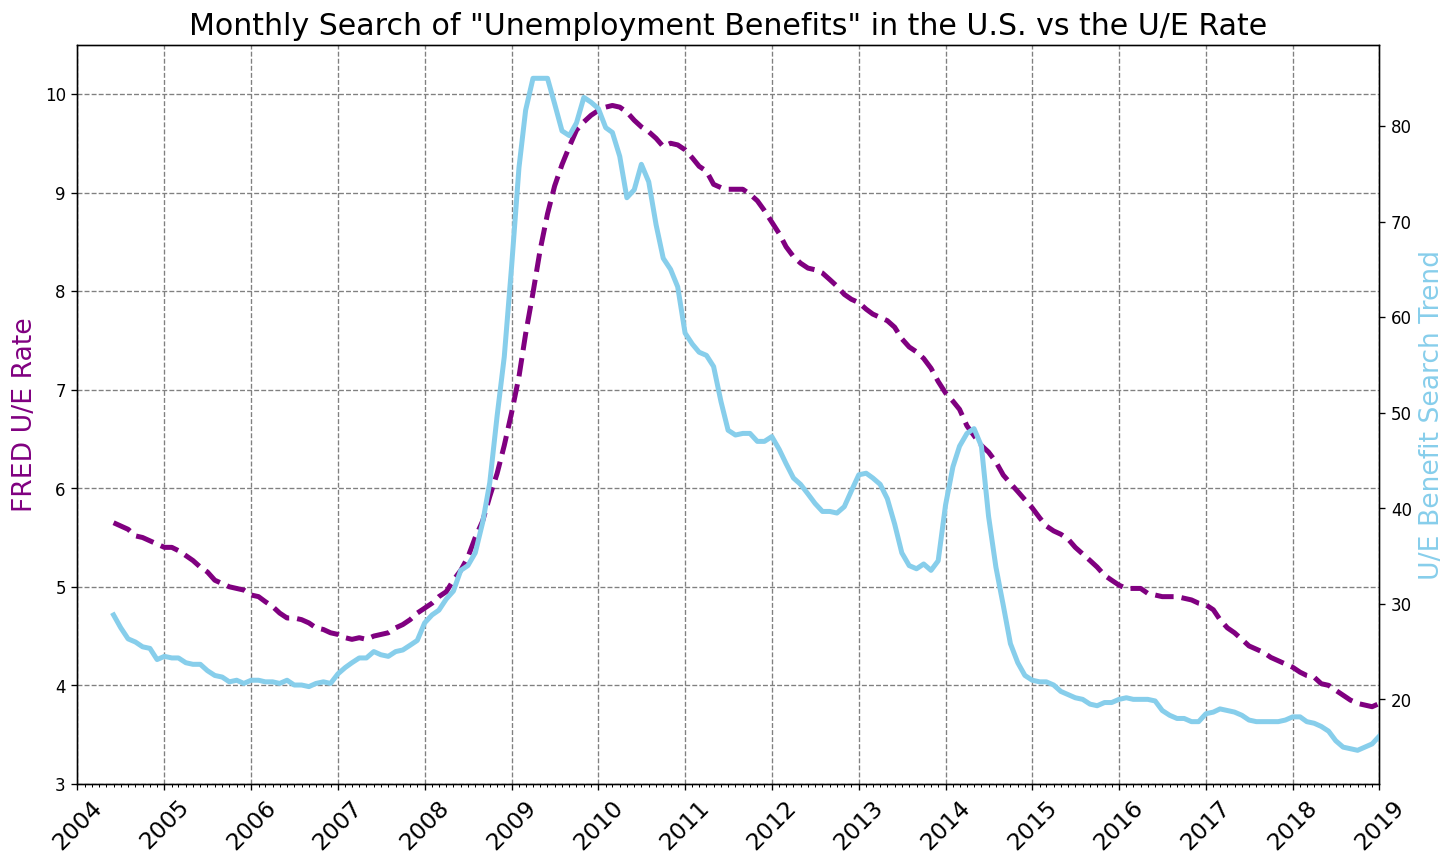

In [ ]:
# The window is number of observations that are averaged
roll_ue_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

# increases size and resolution
plt.figure(figsize=(14,8), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)

# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca() # get current axis
ax2 = ax1.twinx() # create another axis that shares the same x-axis
# Also, increase fontsize and linewidth for larger charts
ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('U/E Benefit Search Trend', color='skyblue', fontsize=16)


# Set the minimum and maximum values on the axes
ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])

ax1.plot(df_unemployment.MONTH, roll_ue_df.UNRATE,
         color='purple', linewidth=3, linestyle='--')
ax2.plot(df_unemployment.MONTH, roll_ue_df.UE_BENEFITS_WEB_SEARCH,
         color='skyblue', linewidth=3)

# Show the grid lines as dark grey lines
ax1.grid(color='grey', linestyle='--')

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_format)
ax1.xaxis.set_minor_locator(months)

# Displays chart explicitly
plt.show()

#### INSIGHT = *We see that searches for "Unemployment Benefits" happen before the actual official unemployment rate goes up. Similarly, the search popularity for the term goes down before the unemployment rate decreases. In other words, **these searches seem to act as a leading economic indicator for the unemployment rate (which is a lagging indicator)**.*

### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

In [ ]:
df_unemployment_20 = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')
df_unemployment_20.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,9,5.7
1,2004-02,8,5.6
2,2004-03,7,5.8
3,2004-04,8,5.6
4,2004-05,6,5.6


In [ ]:
print(type(df_unemployment_20.MONTH[0]))
df_unemployment_20.MONTH = pd.to_datetime(df_unemployment_20['MONTH'])
print(type(df_unemployment_20.MONTH[0]))

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


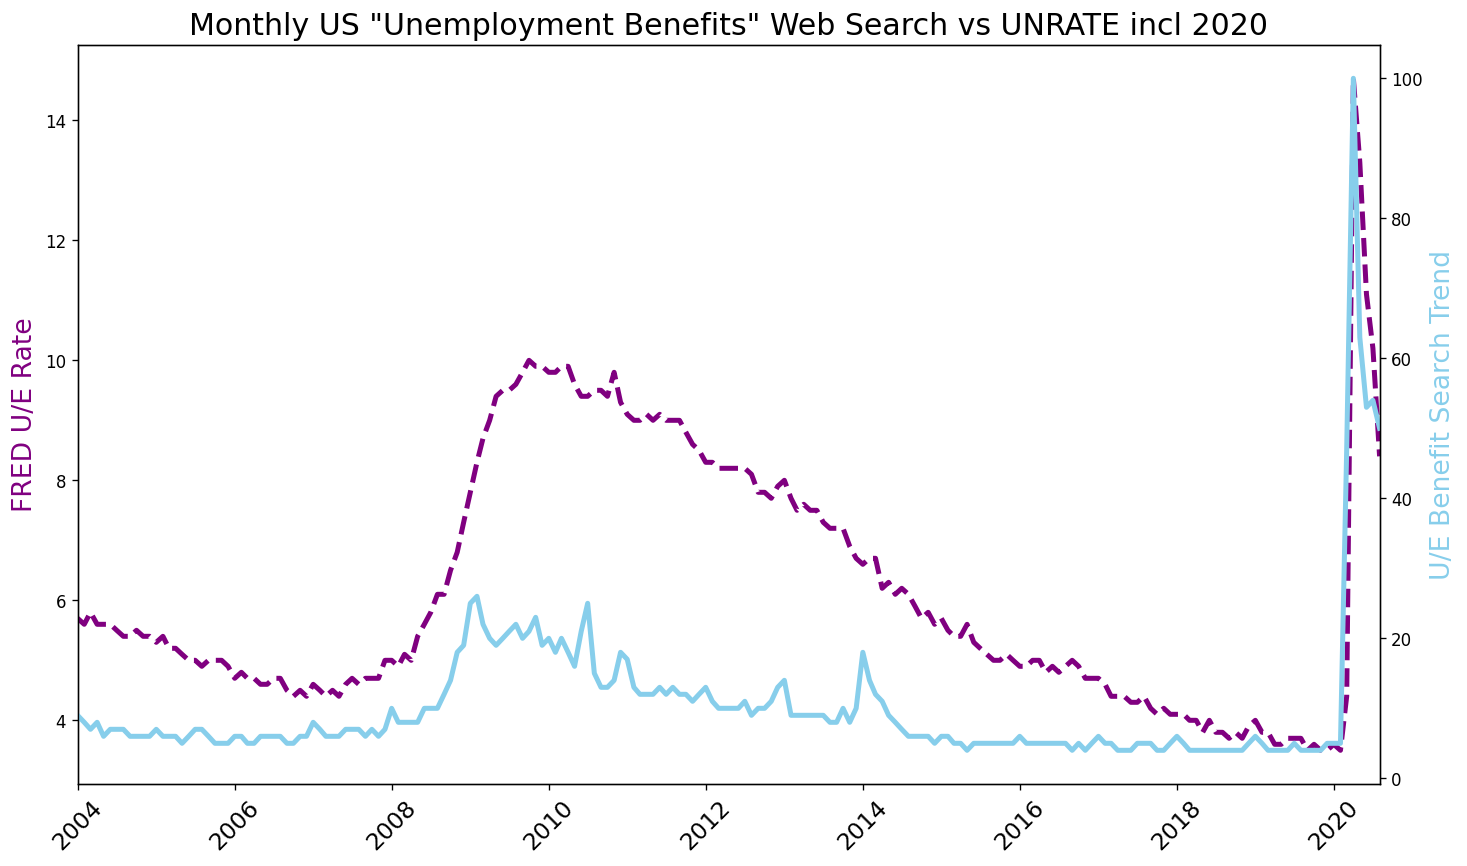

In [ ]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Monthly US "Unemployment Benefits" Web Search vs UNRATE incl 2020', fontsize=18)

plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('U/E Benefit Search Trend', color='skyblue', fontsize=16)

ax1.set_xlim(df_unemployment_20.MONTH.min(), df_unemployment_20.MONTH.max())

ax1.plot(df_unemployment_20.MONTH, df_unemployment_20.UNRATE,
         color='purple', linewidth=3, linestyle='--')
ax2.plot(df_unemployment_20.MONTH, df_unemployment_20.UE_BENEFITS_WEB_SEARCH,
         color='skyblue', linewidth=3)

plt.show()

#### INSIGHT = *What we see is not pretty. The US unemployment rate spiked to unprecedented levels during the COVID pandemic, dwarfing the levels seen during the financial crisis. Let's hope the recovery will be swifter this time.*